# Predicting heart diasease using Machine language
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model of predicting whether or not someone has heart disease based on their medical attributes.
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
## 1. Problem Defination
> Given clinical parameters about a patient, can we predict whether or not hey have heart disease ?
## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository 
There is also a version of it available on Kaggle: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

## 3.Evaluation
>If we can reach 95% accuracy in predicting whether or not a patient has heart disease during proof of concept, we'll pursue the project.
## 4. Features
This is where you'll get different information about your dataset.
**create data dictionary**
1. age	Feature	Integer	Age		years	no2. 
sex	Feature	Categorical	Sex			no3. 
cp	Feature	Categorical				n4. o
trestbps	Feature	Integer		resting blood pressure (on admission to the hospital)	mm Hg	5. no
chol	Feature	Integer		serum cholestoral	mg/dl6. 	no
fbs	Feature	Categorical		fasting blood sugar > 120 mg/dl7. 		no
restecg	Feature	Categorical	8. 			no
thalach	Feature	Integer		maximum heart rate achiev9. ed		no
exang	Feature	Categorical		exercise induced ang10. ina		no
oldpeak	Feature	Integer		ST depression induced by exercise relative to rest		no


## Preparing our tools

In [94]:
#Regular (EDA- exploratory data Analysis) and plottimg libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from sklearn- learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [95]:
##load DATA
df=pd.read_csv("heart-disease.csv")
df.shape  #(rows,columns)

(303, 14)

In [96]:
## EDA (exploratory data analysis)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
# let's find onut how many of each class ther
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

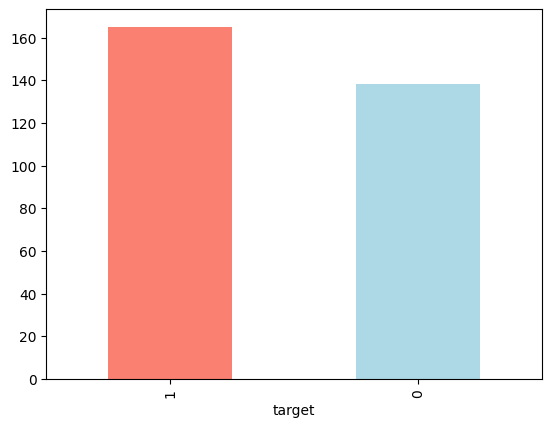

In [98]:
df["target"].value_counts().plot(kind='bar',color=["salmon","lightblue"]);

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [100]:
## Are their any missing value.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [101]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease according to sex.

In [102]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [103]:
#Comapre target coloum with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


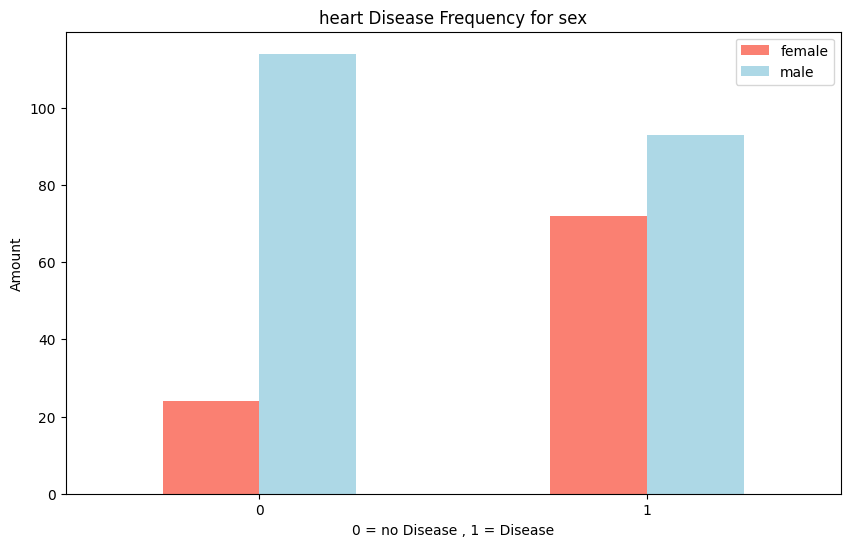

In [104]:
#create  a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart Disease Frequency for sex")
plt.xlabel("0 = no Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0)
plt.yticks(rotation=0);

## Age vs max rate for heart disease

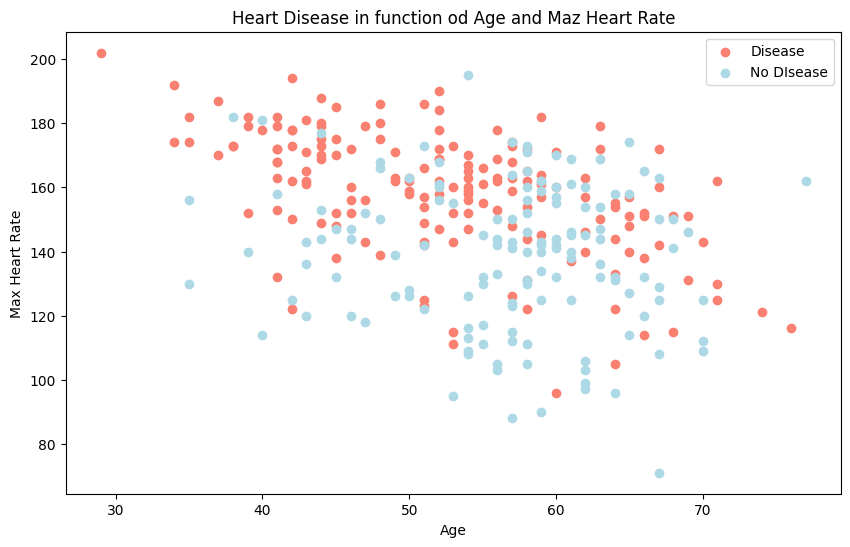

In [105]:
#create another figure
plt.figure(figsize=(10,6))
#Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon");
#Scatter with neagtive examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");
plt.title("Heart Disease in function od Age and Maz Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No DIsease"]);

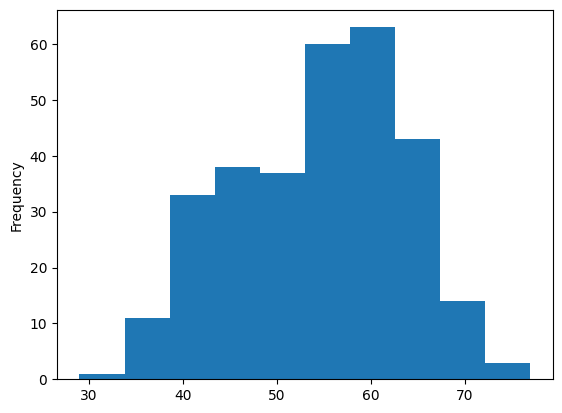

In [106]:
#Check the distribution of the age column with the help of a histogram
df.age.plot.hist();

## Heart disease  Frequency per chest Pain Type


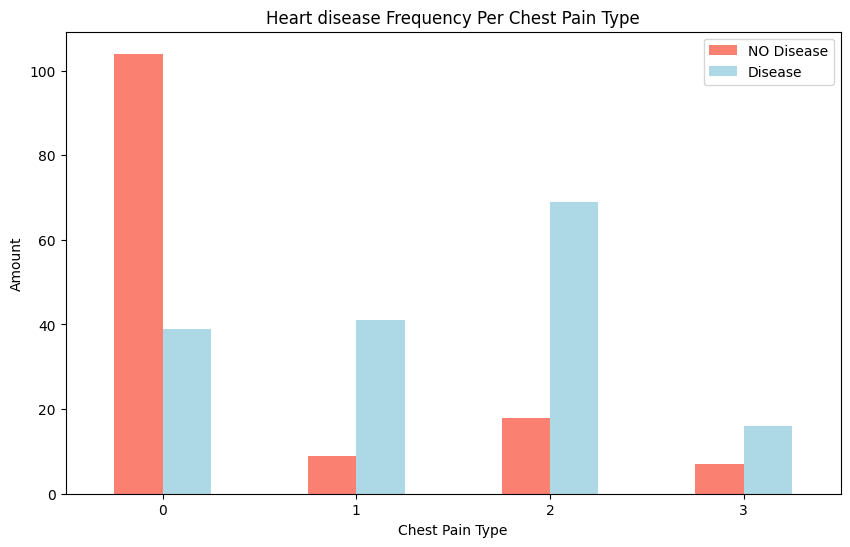

In [107]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NO Disease","Disease"])
plt.xticks(rotation=0);

In [108]:
# Make a  correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


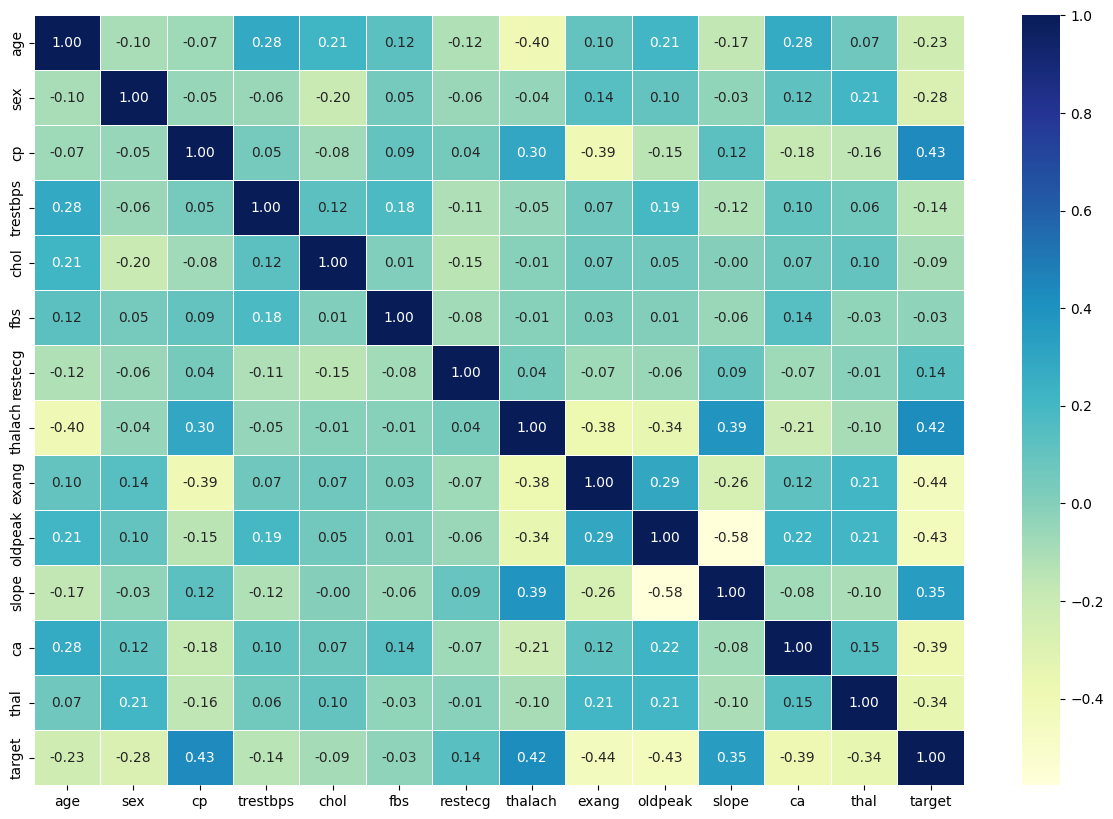

In [109]:
## lets makeour corelation matrix a little pretier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap='YlGnBu')

## Modeling

In [110]:
# Split data into X and y
X=df.drop("target",axis=1)
y=df["target"]

In [111]:
#Split data into train and test sets
np.random.seed(42)
#Split into train& test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### we are going to try 3 different machine learnign model:
1. Logestic Regression
2. K-Nearest Neighbours Classifier
3. RandomForestClassifier

In [112]:
# Put models ina a dictionary
models={"Logestic Regression": LogisticRegression(),
"KNN": KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}
#Create a function to fit and score model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [113]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

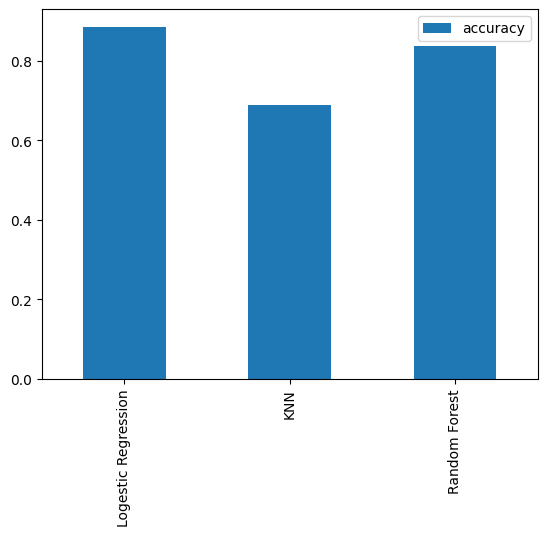

In [114]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();


#### HYPERPARAMETER TUNING (by hand)

In [115]:
#lETS TUNE knn
train_score=[]
test_score=[]
#create a list if different values for n_neighbors
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [116]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [117]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


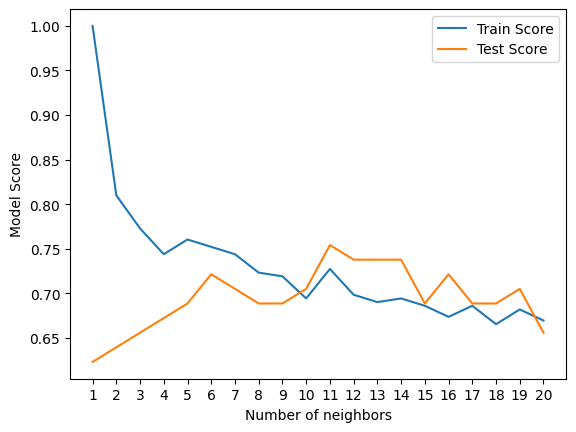

In [118]:
plt.plot(neighbors,train_score,label="Train Score")
plt.plot(neighbors,test_score,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")


## Hyperparameter tuning using randomsearchCV

In [132]:
#Create a hypermeter grid for Logistic Regression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
# Create a hyperparameter grid fro RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [125]:
# Tune Logestic Regression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [126]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [128]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

## tuning the Random Forest Classifier

In [134]:
np.random.seed(41)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [135]:
## find the best parameters
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [136]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### Hyperpamater tuning with GridSearchCV


In [139]:
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [140]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [142]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [143]:
model_scores

{'Logestic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classfier,beyond accuracy
1. ROC curve and AUC score
2. Confusion matrix
3. classification report
4. Precision
5. Recall
6. F1-score
 * **It would be great if cross-validation was used where possible**

In [144]:
# Make prediction with tuned model
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [145]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

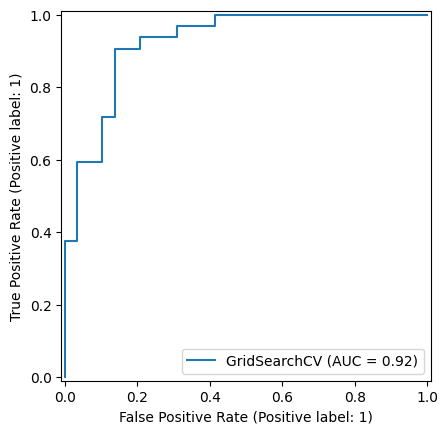

In [149]:
#Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [151]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


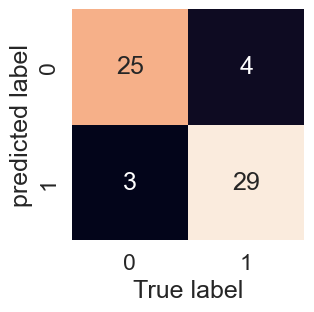

In [154]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3, 3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
plot_conf_mat(y_test,y_preds)

In [155]:
print(classification_report (y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [156]:
### Calculate evaluation metrics using cross-validation
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [158]:
# create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [165]:
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [166]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [167]:
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [168]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

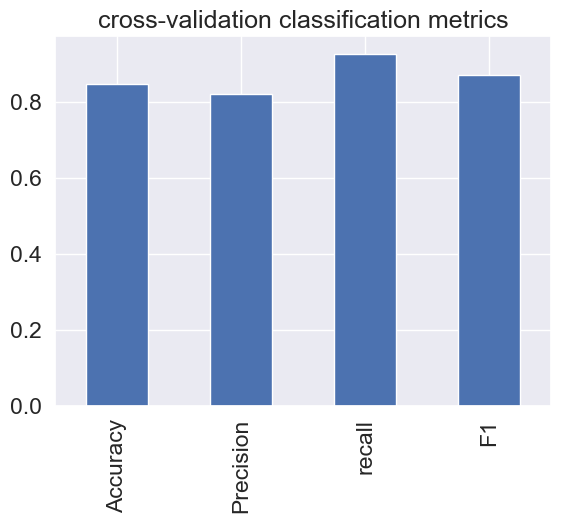

In [171]:
# Visualise cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"recall":cv_recall,"F1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="cross-validation classification metrics",legend=False);

## Feature Importance

In [178]:
#Fit an isntance of logestic Regression
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,y_train);

In [179]:
#check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [181]:
#Match coef_s of festures to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

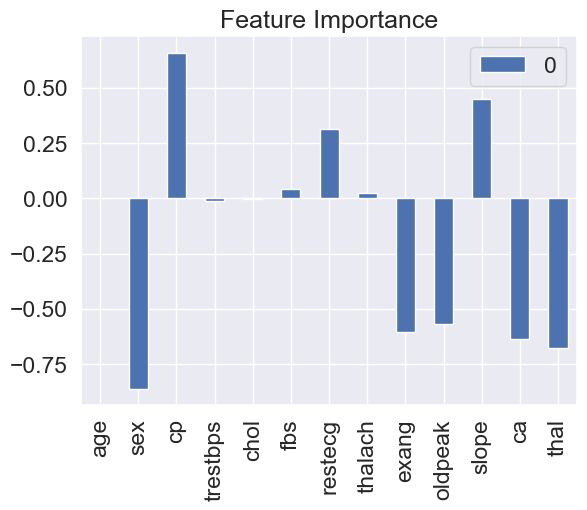

In [184]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend="False");